In [1]:
# Camino de precios Montecarlo 100 días. 

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
from scipy import stats
from datetime import date
today = date.today()
print("Today's date:", today)

Today's date: 2022-05-29


In [3]:
style.use("seaborn")

In [4]:
ticker = input("Introduce el símbolo: ejemplo BBVA.MC.--Bolsa de Madrid. Mercado Continuo o AMZN --NASDAQ     ")            

Introduce el símbolo: ejemplo BBVA.MC.--Bolsa de Madrid. Mercado Continuo o AMZN --NASDAQ     BBVA.MC


In [5]:
data= pd.DataFrame()

In [6]:
data[ticker] = wb.DataReader(ticker,"yahoo","2022-02-1")["Adj Close"]

In [7]:
log_returns = np.log(1+data.pct_change())

In [8]:
u = log_returns.mean()

In [9]:
var = log_returns.var()

In [10]:
drift = u - (0.5*var)

In [11]:
stdev = log_returns.std()

In [12]:
days = 100

In [13]:
trials = 1000

In [14]:
Z = norm.ppf(np.random.rand(days,trials))

In [15]:
retornos_diarios = np.exp(drift.values + stdev.values * Z)

In [16]:
camino_de_precios = np.zeros_like(retornos_diarios)

In [17]:
camino_de_precios[0] = data.iloc[-1]

In [18]:
for t in range(1,days):
    camino_de_precios[t] = camino_de_precios[t-1]*retornos_diarios[t]

In [19]:
# np.savetxt("camino_de_precios.csv",camino_de_precios[t]) # Guardar los datos en un fichero .csv

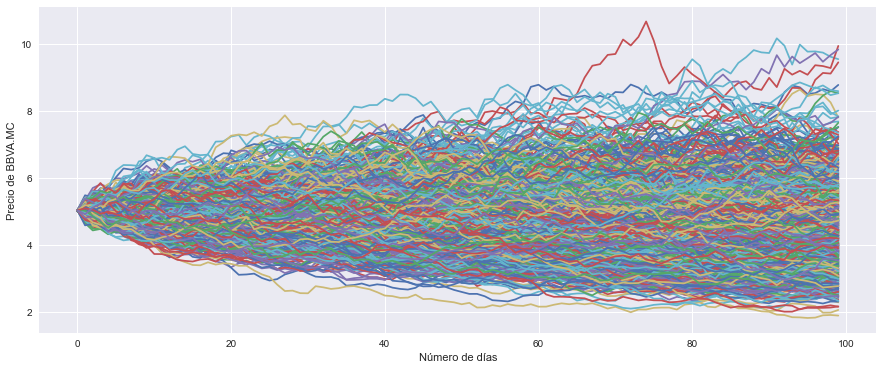

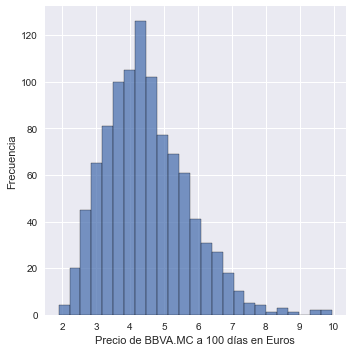

In [20]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(camino_de_precios))
plt.xlabel("Número de días")
plt.ylabel("Precio de " + ticker)
sns.displot(pd.DataFrame(camino_de_precios).iloc[-1])
plt.xlabel("Precio de " + ticker + " a " + str(days) + " días en Euros")
plt.ylabel("Frecuencia")
plt.show()